In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")
# Substitui valores 0 por NaN em PIB_PerCapita (para evitar distorções nas análises)
dados['PIB_PerCapita'] = dados['PIB_PerCapita'].replace(0, np.nan)


warnings.filterwarnings("ignore")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# 🟤 **Regressão - Economia e Empregabilidade**

Nesta etapa, a equipe deu continuidade à análise dos dados por meio da aplicação de regressão linear, com o objetivo de investigar as relações entre variáveis econômicas e indicadores de empregabilidade. Este documento tem como propósito aprofundar a compreensão dessas relações, avaliando a significância estatística das variáveis explicativas e seu impacto sobre o PIB per capita. Para isso, foram realizados testes e análises que permitem identificar quais fatores têm maior influência e contribuem para explicar a variação do PIB per capita nos municípios, possibilitando assim tirar conclusões fundamentadas a partir dos dados disponíveis.


Durante a aplicação da inferência estatística, foi formulada uma nova pergunta para verificar se existe alguma relação entre o PIB per capita dos municípios e a proporção de pessoal assalariado. Após a realização do teste t de Welch nos dados,foi identificada uma diferença significativa no PIB per capita entre municípios com diferentes proporções de pessoal assalariado. No entanto, o teste não esclarece como essa relação se manifesta. Para aprofundar essa análise, a equipe aplicou a regressão linear para investigar a relação entre essas variáveis e avaliar se a proporção de pessoal assalariado pode explicar a variação do PIB per capita, além de investigar se outros fatores também influenciam o PIB per capita.


###🔹 Regressão Linear Simples com Proporção de Pessoal Assalariado



Inicialmente, para investigar a existência de uma possível relação linear entre a proporção de pessoal assalariado e o PIB per capita dos municípios, foi realizada uma regressão linear simples utilizando o modelo **LinearRegression**. Nesse modelo, a variável independente (X) escolhida foi a proporção de pessoal assalariado, pois buscamos entender como essa característica poderia influenciar o PIB per capita, que foi a variável dependente (Y). Foram calculados o coeficiente angular, o intercepto e o coeficiente de determinação (R²) para interpretar o grau e a direção da relação entre as variáveis. Para complementar a análise, também foi gerado um gráfico de dispersão com a linha de regressão ajustada, facilitando a visualização do padrão de relacionamento entre as duas variáveis.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

dados_limpos = dados[
    (dados['Proporcao_PessoalAssalariado'] <= 1) &
    (~dados['Proporcao_PessoalAssalariado'].isna()) &
    (~dados['PIB_PerCapita'].isna())
][['Proporcao_PessoalAssalariado', 'PIB_PerCapita']]


x = dados_limpos[['Proporcao_PessoalAssalariado']]
y = dados_limpos['PIB_PerCapita']

modelo = LinearRegression()
modelo.fit(x, y)

coef = modelo.coef_[0]
intercept = modelo.intercept_
r2 = modelo.score(x, y)

print(f"Coeficiente: {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"R²: {r2:.4f}")




Coeficiente: -34.9175
Intercepto: 53.1575
R²: 0.0109


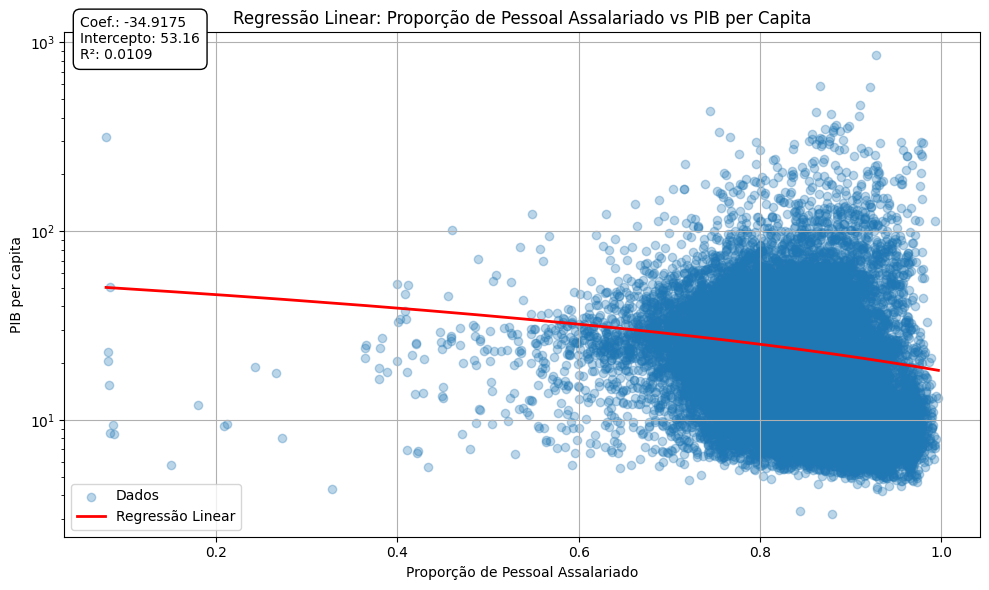

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.3, label='Dados')

x_sorted = np.sort(x.values.ravel())
y_pred_sorted = modelo.predict(x_sorted.reshape(-1, 1))


plt.plot(x_sorted, y_pred_sorted, color='red', label='Regressão Linear', linewidth=2)


plt.text(
    0.05, y.max()*0.95,
    f'Coef.: {coef:.4f}\nIntercepto: {intercept:.2f}\nR²: {r2:.4f}',
    fontsize=10,
    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5')
)


plt.xlabel('Proporção de Pessoal Assalariado')
plt.ylabel('PIB per capita')
plt.title('Regressão Linear: Proporção de Pessoal Assalariado vs PIB per Capita')
plt.legend()
plt.grid(True)

plt.yscale('log')

plt.tight_layout()
plt.show()

###🔹Interpretação dos Resultados

Com um coeficiente de -34,92 e intercepto de 53,16, a regressão linear sugere que, à medida que a proporção de pessoal assalariado aumenta em uma unidade (de 0 a 1), o PIB per capita tende a diminuir, em média, cerca de 34,92 unidades. No entanto, o valor de R² igual a 0,0109 indica que apenas cerca de 1,1% da variação do PIB per capita é explicada pela proporção de pessoal assalariado, o que evidencia uma relação fraca entre as variáveis. Isso significa que, embora exista uma inclinação negativa na reta de regressão, ela não representa bem a tendência dos dados, e outros fatores provavelmente têm influência mais significativa sobre o PIB per capita. Portanto, essa variável isolada não é suficiente para explicar variações relevantes no PIB per capita dos municípios analisados.


### 🔹 Regressão Linear Multivariada

Após a aplicação da regressão linear simples entre a proporção de pessoal assalariado e o PIB per capita, os resultados indicaram uma relação praticamente inexistente entre essas variáveis, com um coeficiente de determinação R² próximo de zero. Isso sugeriu que a proporção de pessoal assalariado isoladamente não é suficiente para explicar as variações no PIB per capita dos municípios.

Diante disso, optou-se por aprofundar a investigação por meio de uma regressão linear múltipla, incorporando outras variáveis que poderiam estar relacionadas ao desempenho econômico municipal. As variáveis escolhidas como independentes (X) foram:


*   Proporção de Pessoal Assalariado
*   Importações (US\$)
*   Exportações (US\$)
*   Área Plantada (hectares)
*   Transferências Correntes (R\$)

Essas variáveis foram selecionadas por representarem aspectos econômicos relevantes,fatores que potencialmente influenciam o PIB per capita. A variável dependente (Y) permaneceu sendo o PIB per capita.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

colunas = ['Proporcao_PessoalAssalariado', 'Importacoes_US$', 'AreaPlantada_h', 'Exportacoes_US$', 'Transferencias_correntes_R$']

dados_filtrados = dados[
    (dados['Proporcao_PessoalAssalariado'] <= 1) &
    dados[colunas + ['PIB_PerCapita']].notna().all(axis=1)
]

x_mult = dados_filtrados[colunas]
y = dados_filtrados['PIB_PerCapita']


modelo_mult = LinearRegression()
modelo_mult.fit(x_mult, y)

r2_mult = modelo_mult.score(x_mult, y)
coef_mult = dict(zip(colunas, modelo_mult.coef_))

print(f"R² multivariado: {r2_mult}")
print("Coeficientes:")
for var, coef in coef_mult.items():
    print(f"  {var}: {coef}")


R² multivariado: 0.11073311394696661
Coeficientes:
  Proporcao_PessoalAssalariado: -31.996974018904588
  Importacoes_US$: 1.7242339073562305e-08
  AreaPlantada_h: 0.005438187315400743
  Exportacoes_US$: 9.720559584527906e-09
  Transferencias_correntes_R$: -5.103664844247358e-09


###🔹Interpretação dos Resultados


Com um R² multivariado de aproximadamente 0,11, o modelo consegue explicar apenas cerca de 11% da variação no PIB per capita a partir das variáveis analisadas. Isso indica que, embora tenha havido um leve ganho em relação ao modelo univariado anterior, ainda há muita variabilidade não explicada por essas variáveis — sugerindo que outros fatores (possivelmente sociais, educacionais, de infraestrutura etc.) podem ser mais relevantes para explicar o PIB per capita. Entre os coeficientes, destaca-se a proporção de pessoal assalariado com um impacto negativo mais expressivo, indicando que, controladas as demais variáveis, quanto maior essa proporção, menor tende a ser o PIB per capita — o que pode refletir distorções ou peculiaridades do mercado de trabalho em algumas regiões.



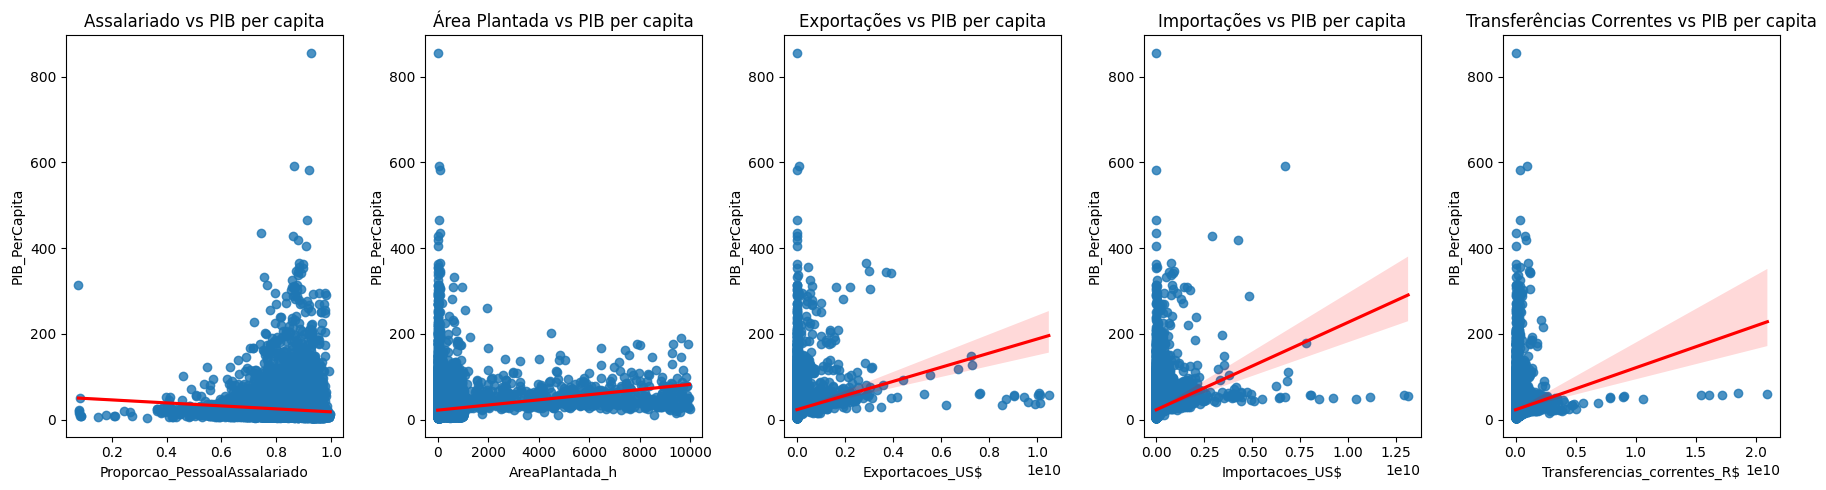

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

sns.regplot(x='Proporcao_PessoalAssalariado', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('Assalariado vs PIB per capita')

sns.regplot(x='AreaPlantada_h', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[1], line_kws={'color': 'red'})
axes[1].set_title('Área Plantada vs PIB per capita')

sns.regplot(x='Exportacoes_US$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[2], line_kws={'color': 'red'})
axes[2].set_title('Exportações vs PIB per capita')

sns.regplot(x='Importacoes_US$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[3], line_kws={'color': 'red'})
axes[3].set_title('Importações vs PIB per capita')

sns.regplot(x='Transferencias_correntes_R$', y='PIB_PerCapita', data=dados_filtrados,
            ax=axes[4], line_kws={'color': 'red'})
axes[4].set_title('Transferências Correntes vs PIB per capita')

plt.tight_layout()
plt.show()


## 🔹 Conclusão

No modelo simples, a proporção de pessoal assalariado apresenta um coeficiente negativo de -34,92, sugerindo que, isoladamente, quanto maior essa proporção, menor tende a ser o PIB per capita, em média, em cerca de 34,92 unidades para cada aumento unitário na proporção. Porém, o valor de R² de apenas 0,0109 indica que essa variável explica somente cerca de 1,1% da variação do PIB per capita, evidenciando uma relação fraca e insuficiente para explicar significativamente o desempenho econômico dos municípios. Já no modelo multivariado, que considera várias variáveis simultaneamente, o R² sobe para aproximadamente 0,11, mostrando um leve ganho explicativo, mas ainda assim indicando que apenas 11% da variação no PIB per capita é explicada pelos fatores analisados. Isso sugere que outras variáveis importantes — possivelmente sociais, educacionais, de infraestrutura, entre outras — influenciam de forma mais significativa o PIB per capita, e que os modelos atuais não capturam toda a complexidade do fenômeno econômico municipal.


# 🔹 Regressão Linear: Transferências de Capital vs Empregos nos municípios

Com o intuito de compreender melhor as concepções acerca do questionamento: "**De que maneira o investimento público nos Municípios afeta a empregabilidade destes? Cidades que recebem mais transferências (dinheiro) geram mais empregos?**", a equipe optou pela aplicação de uma regressão linear. Assim, isso fortalece a análise da pergunta e, consequentemente, auxilia na busca por respostas plausíveis.

Por isso, aplicou-se a Regressão Linear entre Transferências de Capital vs Empregos, com o objetivo de compreender se, quanto mais dinheiro público um município recebe, mais empregos ele gera.
*   Variável independente: **Transferencias_capital_R$** 💸
*   Variável dependente: **PessoalOcupado** 👷



In [ ]:
from sklearn.linear_model import LinearRegression

X = dados[["Transferencias_capital_R$"]]
y = dados["PessoalOcupado"]

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), y)

print("Coeficiente estimado:", lm.coef_)
print("R2 (score):", lm.score(X.values.reshape(-1,1), y))


Coeficiente estimado: [0.00825391]
R2 (score): 0.6973081367927472


Aplicando a Regressão Linear entre os atributos, pode-se notar que fora obtido um coeficiente estimado que estabelece a seguinte relação:
- Para cada R$ 1 milhão a mais recebido em transferências de capital, o município tende a aumentar em cerca de 8 vagas de trabalho.

Com relação ao Coeficiente de determinação, o que pode ser afirmado é que aproximadamente 69,73% da variação do número de pessoas ocupadas nas cidades pode ser explicada pela variação acerca das transferências de capital.

Nesse sentido, fora plotado um gráfico para que essa relação também possa ser visualizada de uma maneira melhor.

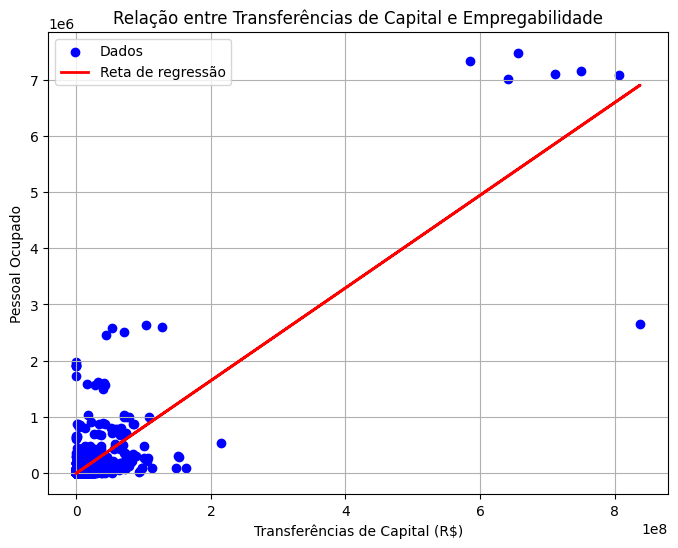

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y_pred = lm.predict(X)

# Plotando o gráfico pra comparacao
plt.figure(figsize=(8,6))
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(X, y_pred, color='red', linewidth=2, label='Reta de regressão')

plt.xlabel('Transferências de Capital (R$)')
plt.ylabel('Pessoal Ocupado')
plt.title('Relação entre Transferências de Capital e Empregabilidade')
plt.legend()
plt.grid(True)
plt.show()


O que pode ser observado é que o gráfico acima apresenta a distribuição dos dados entre as transferências de capital recebidas pelos municípios e o número de pessoas ocupadas, juntamente com a reta de regressão linear. Analisando, tem-se uma relação positiva, indicando que maiores transferências públicas tendem a estar associadas a um aumento no nível de emprego. Contudo, observa-se também uma dispersão considerável, o que indica que alguns outros fatores podem influenciar essa relação.

Por fim, o que se pode concluir acerca da Regressão aplicada é que o modelo sugere uma relação, de certa forma, positiva entre os investimentos públicos feitos em um município e o seu nível de empregabilidade. Ou seja, **quanto maiores os níveis de transferências capitais, maiores os níveis de empregabilidade**.


# 🔹 Regressão Linear: Produto Interno Bruto (PIB) vs População

Seguindo com a aplicação da Regressão Linear na area Econômica, surgiu a oportunidade de aplicá-la na relação entre o **PIB e a População**, a fim de compreender melhor tal comportamento entre as variáveis, e se cidades com maior população tendem a ter maior PIB. Logo, a análise do modelo permitiu, à equipe, uma visualização mais clara acerca do entendimento da relação geral entre esses atributos.
*   Variável independente: **Populacao** 🧑
*   Variável dependente: **PIB** 💸

In [ ]:
from sklearn.linear_model import LinearRegression

dados_limpos = dados[['Populacao', 'PIB']].dropna()

X = dados_limpos["Populacao"]
y = dados_limpos["PIB"]

lm = LinearRegression()
lm.fit(X.values.reshape(-1,1), y)

print("Coeficiente estimado:", lm.coef_)
print("R² (score):", lm.score(X.values.reshape(-1,1), y))

Coeficiente estimado: [43.4598171]
R² (score): 0.7627764201902634


Diante desses valores, pode-se notar que fora obtido um coeficiente estimado de cerca de **43,46** , que estabelece a seguinte relação:
- A cada 1 pessoa na população da cidade, espera-se que haja um acréscimo de cerca de R$ 43,46 no PIB do município em questão. Ou seja, **se a população aumenta, consequentemente o PIB tende a aumentar também**.

Com relação ao Coeficiente de determinação, o que pode ser afirmado é que aproximadamente **76,28%** da variação do valor do PIB das cidades pode ser explicada pela variação acerca da população. Esse resultado apenas reforça a hipótese de que municípios mais populosos tendem a apresentar maiores níveis de atividade econômica. Todavia, embora os resultados sejam relevantes, é importante ressaltar que o modelo não capta todos os fatores que influênciam no PIB, e a equipe reconhece as limitações inerentes a uma análise baseada em Regressão Linear simples.

Logo, conclui-se que tal modelo demonstra uma **forte relação entre a população e o PIB**, e só reafirma cada vez mais a relação positiva presente, que conversa, de maneira geral, com outros pontos abordados anteriormente e estudados no caderno de Economia.